In [68]:
#importing important libraries
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [69]:
dataset=pd.read_csv(r"TSLA_data.csv") #importing data set 

In [70]:
dataset.head() #printing the priview of the data first 5 rows

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778
1,2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766
2,2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392
3,2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840
4,2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222


In [71]:
dataset['Date'] = pd.to_datetime(dataset.Date) #this is to convert array like data to pandas date and tinme data to further use

In [72]:
dataset.shape #this we have used to shape of the data set

(2985, 7)

In [73]:
dataset.drop('Adj Close',axis = 1, inplace = True) #this meyhod removes specific column by specifying the colum axis drop method removes specific row

In [75]:
dataset.head() #printing the results

,Date,High,Low,Open,Close,Volume
0,2010-06-29,5.000,3.508,3.800,4.778,93831500.0
1,2010-06-30,6.084,4.660,5.158,4.766,85935500.0
2,2010-07-01,5.184,4.054,5.000,4.392,41094000.0
3,2010-07-02,4.620,3.742,4.600,3.840,25699000.0
4,2010-07-06,4.000,3.166,4.000,3.222,34334500.0


In [76]:
dataset.isnull().sum() #it has defult axis=none which should summing across the rows 

Date      0
High      0
Low       0
Open      0
Close     0
Volume    0
dtype: int64

In [77]:
dataset.isna().any() #to detect the missing values values for array obl=ject

Date      False
High      False
Low       False
Open      False
Close     False
Volume    False
dtype: bool

In [78]:
dataset.info() #to concise the summary of the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985 entries, 0 to 2984
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2985 non-null   datetime64[ns]
 1   High    2985 non-null   float64       
 2   Low     2985 non-null   float64       
 3   Open    2985 non-null   float64       
 4   Close   2985 non-null   float64       
 5   Volume  2985 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 140.0 KB


In [79]:
dataset.describe() #method to calculatinf some statistical data lke mean, std 

,High,Low,Open,Close,Volume
count,2985.000000,2985.000000,2985.000000,2985.000000,2.985000e+03
mean,150.385949,143.598605,147.125113,147.115743,3.125378e+07
std,269.157062,256.355372,263.095677,262.921696,2.786297e+07
min,3.326000,2.996000,3.228000,3.160000,5.925000e+05
25%,20.950001,19.865999,20.492001,20.440001,1.321430e+07
50%,47.750000,46.048000,46.938000,46.958000,2.487450e+07
75%,69.734001,67.473999,68.767998,68.769997,3.965700e+07
max,1243.489990,1217.000000,1234.410034,1229.910034,3.046940e+08


In [80]:
print(len(dataset)) #method to measure the shape of the dataframe(length)

2985


<AxesSubplot:>

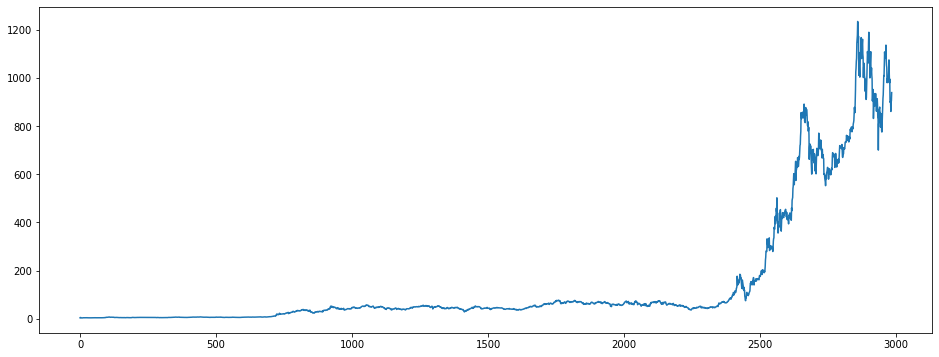

In [81]:
dataset['Open'].plot(figsize=(16,6)) #to visualize the data set from the opening values and fig size is tuple of the figure

In [82]:
X  = dataset[['Open','High','Low','Volume']] #forecasting data 
y = dataset['Close'] #forecasting from the close

In [85]:
from sklearn.model_selection import train_test_split #splitting the arry into teo subset for trainng data for forecasting and for tes data
X_train , X_test , y_train , y_test = train_test_split(X ,y , random_state = 0) 

#x_train : #The training part of the first sequence ( x ) x_test  The test part of the first sequence ( x ) y_train : The training part of the second sequence ( y ) y_test : The test part of the second sequence ( y ) 

In [86]:
X_train.shape #shape of train model

(2238, 4)

In [87]:
X_test.shape #shpe of thr test 

(747, 4)

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score #cof.matricx implementes several loss,score and utility func. to measure classifiaction 
regressor = LinearRegression() #fits the linear model to minimize the residual sum of squares between observed targets in the dataset, and the targets pridicted bythe lonear approx 

In [89]:
regressor.fit(X_train,y_train) #

LinearRegression()

In [90]:
print(regressor.coef_)

[-7.53195884e-01  9.46616749e-01  8.05515251e-01  2.01992294e-09]


In [91]:
print(regressor.intercept_) #represents the mean value of the response variable when all of the predictor variables in the model are equal to zero.

-0.07555246789905823


In [95]:
predicted=regressor.predict(X_test) #simple pridiction based on independent variable X_test
print(X_test)

             Open         High          Low      Volume
2737   601.539978   606.460022   559.650024  44184900.0
1949    60.799999    60.854000    55.436001  69360000.0
316      5.200000     5.300000     4.902000   3616500.0
1708    62.675999    62.694000    61.099998  28623000.0
701      8.650000     9.028000     8.610000  15747000.0
...           ...          ...          ...         ...
1588    39.198002    39.894001    38.652000  28402500.0
1513    41.228001    43.647999    41.200001  27000000.0
487      5.606000     5.682000     5.422000   5154500.0
2048    67.982002    68.456001    66.764000  30320000.0
2871  1162.329956  1201.949951  1132.430054  33072500.0

[747 rows x 4 columns]


In [96]:
predicted.shape

(747,)

In [97]:
dframe=pd.DataFrame(y_test,predicted)

In [98]:
dfr=pd.DataFrame({'Actual':y_test,'Predicted':predicted})

In [99]:
print(dfr)

           Actual    Predicted
2737   571.690002   571.828106
1949    55.835999    56.530200
316      4.918000     4.980839
1708    61.742001    61.339131
701      8.750000     8.922653
...           ...          ...
1588    39.820000    39.357150
1513    43.299999    43.431381
487      5.576000     5.458623
2048    67.089996    67.362945
2871  1156.869995  1174.504746

[747 rows x 2 columns]


In [100]:
dfr.head(25)

,Actual,Predicted
2737,571.690002,571.828106
1949,55.835999,56.530200
316,4.918000,4.980839
1708,61.742001,61.339131
701,8.750000,8.922653
1269,52.627998,52.627363
536,6.234000,6.074678
1450,49.397999,49.516661
711,10.240000,10.286843
22,3.988000,3.905182


In [101]:
from sklearn.metrics import confusion_matrix, accuracy_score
regressor.score(X_test,y_test)

0.9997144285590365

In [102]:
import math
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))


Mean Absolute Error: 1.412281044849625
Mean Squared  Error: 19.527599525120728
Root Mean Squared Error: 4.419004359029388


In [103]:
graph=dfr.head(20)

<AxesSubplot:>

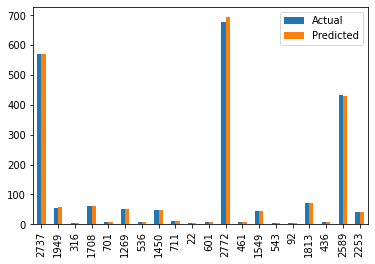

In [107]:
graph.plot(kind='bar')